In [1]:
# import needed libraries
import networkx as nx
import numpy as np

In [2]:
# Load Enron Graph Data
G = nx.read_edgelist("email-Enron.txt.gz")

In [3]:
# Get number of Nodes/Order
G.number_of_nodes()

36692

In [4]:
# Get number of Edges/Size
G.number_of_edges()

183831

In [5]:
def get_degrees(graph):
    return [graph.degree(n) for n in graph.nodes()]

degrees = get_degrees(G)

print('Max', np.max(degrees))
print('Min', np.min(degrees))
print('Mean', np.mean(degrees))

Max 1383
Min 1
Mean 10.020222391802028


In [6]:
# Checking if graph is connected
nx.is_connected(G)

False

In [7]:
# Number of Connected Components
nx.number_connected_components(G)

1065

In [8]:
# Generate Sub-Graph of largest connected component
largest_cc = max(nx.connected_components(G), key=len)
S = G.subgraph(largest_cc).copy()

In [9]:
# Get Radius of largest connected component
nx.radius(S)

7

In [10]:
# Get Diameter of largest connected component
nx.diameter(S)

13

In [11]:
# Graph Transitivity
nx.transitivity(G)

0.0853107962707866

In [12]:
# Average Clustering Co-efficient
nx.average_clustering(G)

0.49698255959950266

In [13]:
# Get number of Nodes/Order of largest connected component
S.order()

33696

In [14]:
# Get size of largest connected component
S.size()

180811

In [15]:
# Ratio of Size of entire Graph to Connected Component
S.size()/G.size()

0.9835718676392992

In [16]:
# Ratio of Order of entire Graph to Connected Component
S.order()/G.order()

0.9183473236672844

In [17]:
# Total Number of traingles
sum(nx.triangles(G).values())/3

727044.0

In [18]:
# Convert gexf 
nx.write_gexf(G, "email-Enron.gexf")

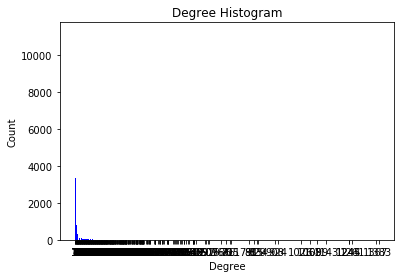

In [20]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# # draw graph in inset
# plt.axes([0.4, 0.4, 0.5, 0.5])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(G)
# plt.axis('off')
# nx.draw_networkx_nodes(G, pos, node_size=20)
# nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()